#**Wine Quality Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [2]:
#importing the dataset and separating columns by semicolons
red = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')

## **About the Dataset**

In [3]:
#number or rows and columns in the dataset
print("Red Wine Dataset: ", red.shape)
print("White Wine Dataset: ", white.shape)

Red Wine Dataset:  (1599, 12)
White Wine Dataset:  (4898, 12)


In [4]:
#first 5 rows of the dataset (red)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#first 5 rows of the dataset (white)
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#information about the dataset
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#information about the dataset
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
#checking for missing values
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#checking for missing values
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Stats

In [68]:
#getting overall stats about the data
red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_c
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [61]:
#getting overall stats about the data
white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_c
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


In [67]:
# Remove spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



## **Data Analysis**

In [66]:
# Function to select red or white dataset
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red)
    print('\nWhite Wine\n')
    functionToCall(white)

### Catplots

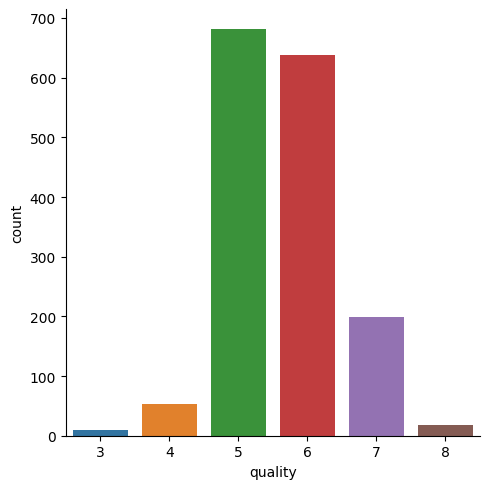

In [69]:
#number of values for each quality
sns.catplot(x = 'quality', data = red, kind = 'count')

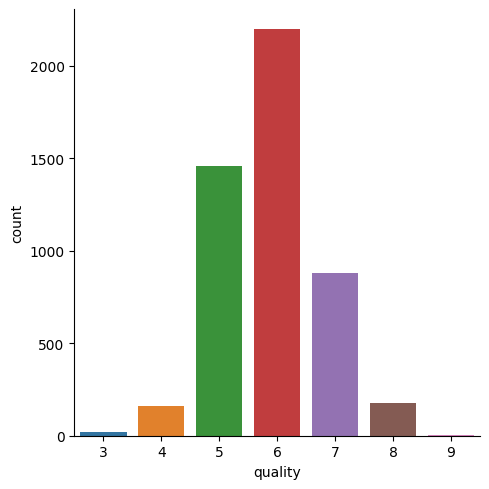

In [70]:
#number of values for each quality
sns.catplot(x = 'quality', data = white, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile_acidity'>

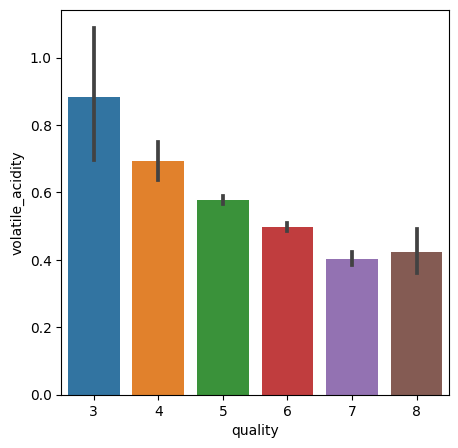

In [72]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile_acidity', data=red)

<Axes: xlabel='quality', ylabel='volatile_acidity'>

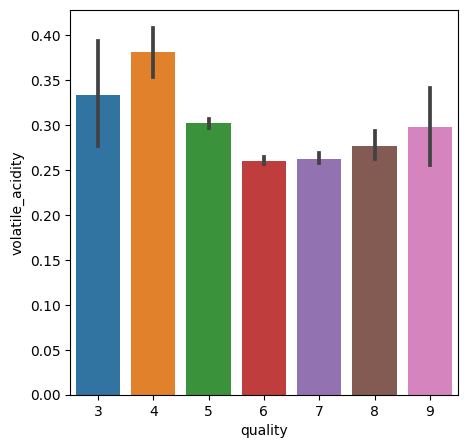

In [73]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile_acidity', data=white)

<Axes: xlabel='quality', ylabel='citric_acid'>

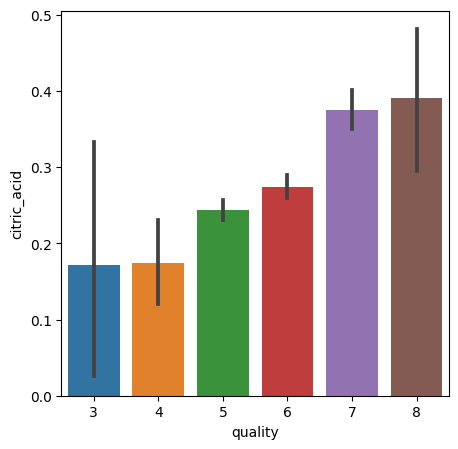

In [74]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric_acid', data=red)

<Axes: xlabel='quality', ylabel='citric_acid'>

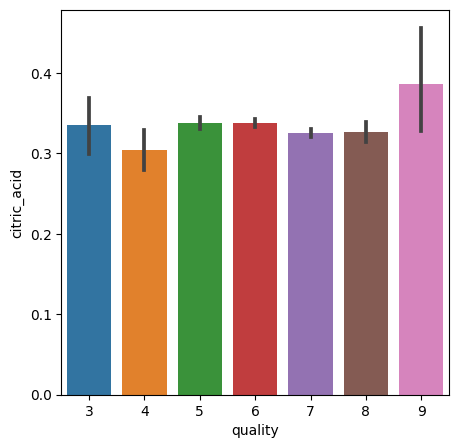

In [76]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric_acid', data=white)

### Factorplots

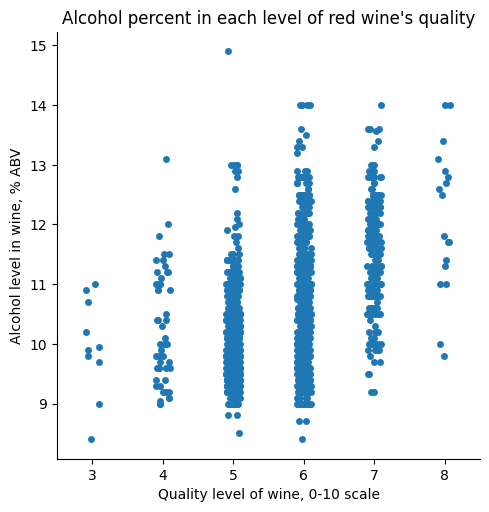

In [81]:
sns.catplot(x="quality", y="alcohol", data=red, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")
plt.title("Alcohol percent in each level of red wine's quality")
plt.show()

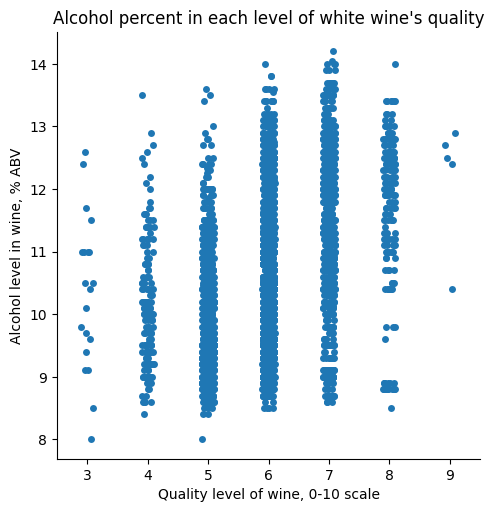

In [82]:
sns.catplot(x="quality", y="alcohol", data=white, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine, % ABV")
plt.title("Alcohol percent in each level of white wine's quality")
plt.show()

### Correlation Matrix

<Axes: >

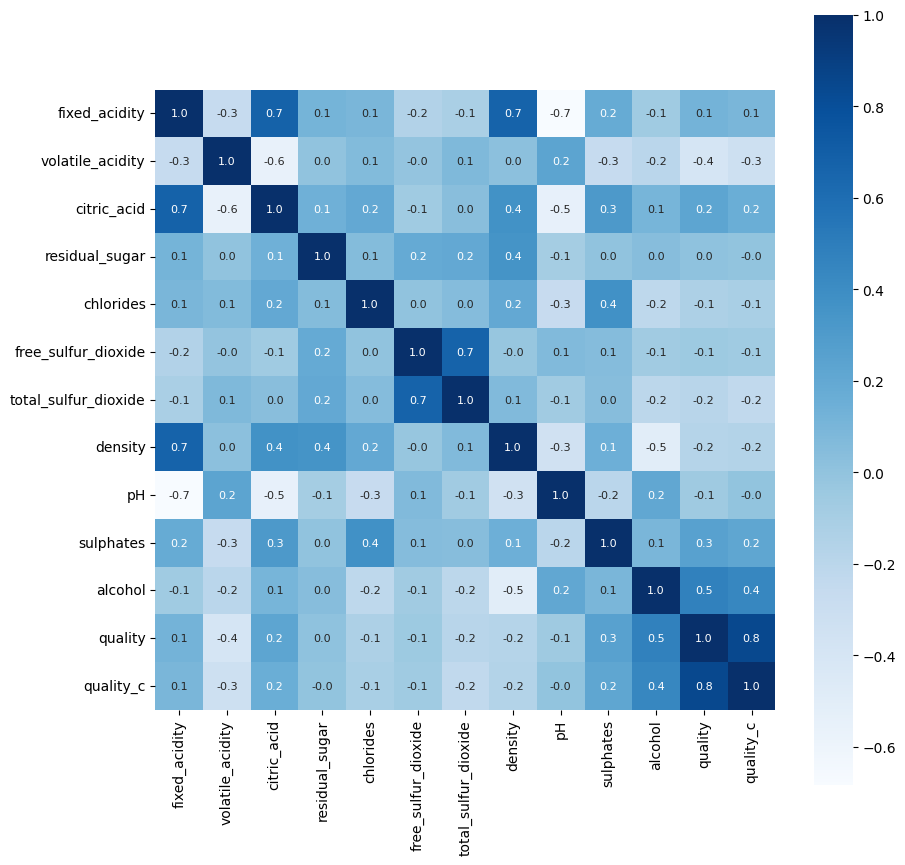

In [79]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(red.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: >

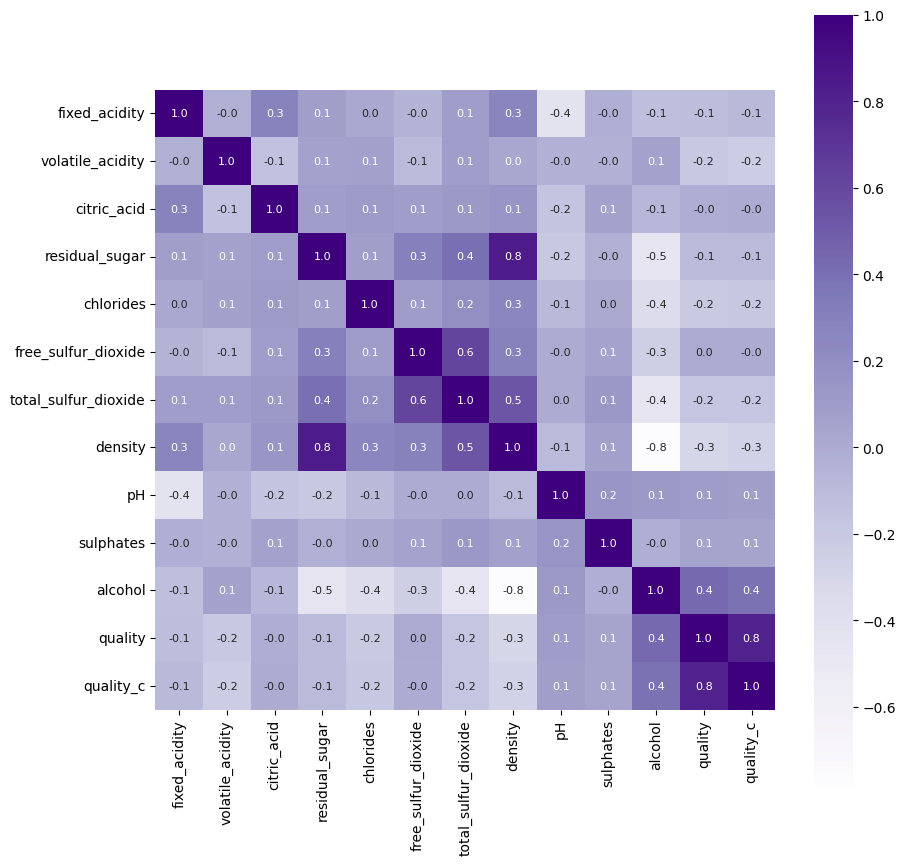

In [80]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(white.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

### Pair Plot

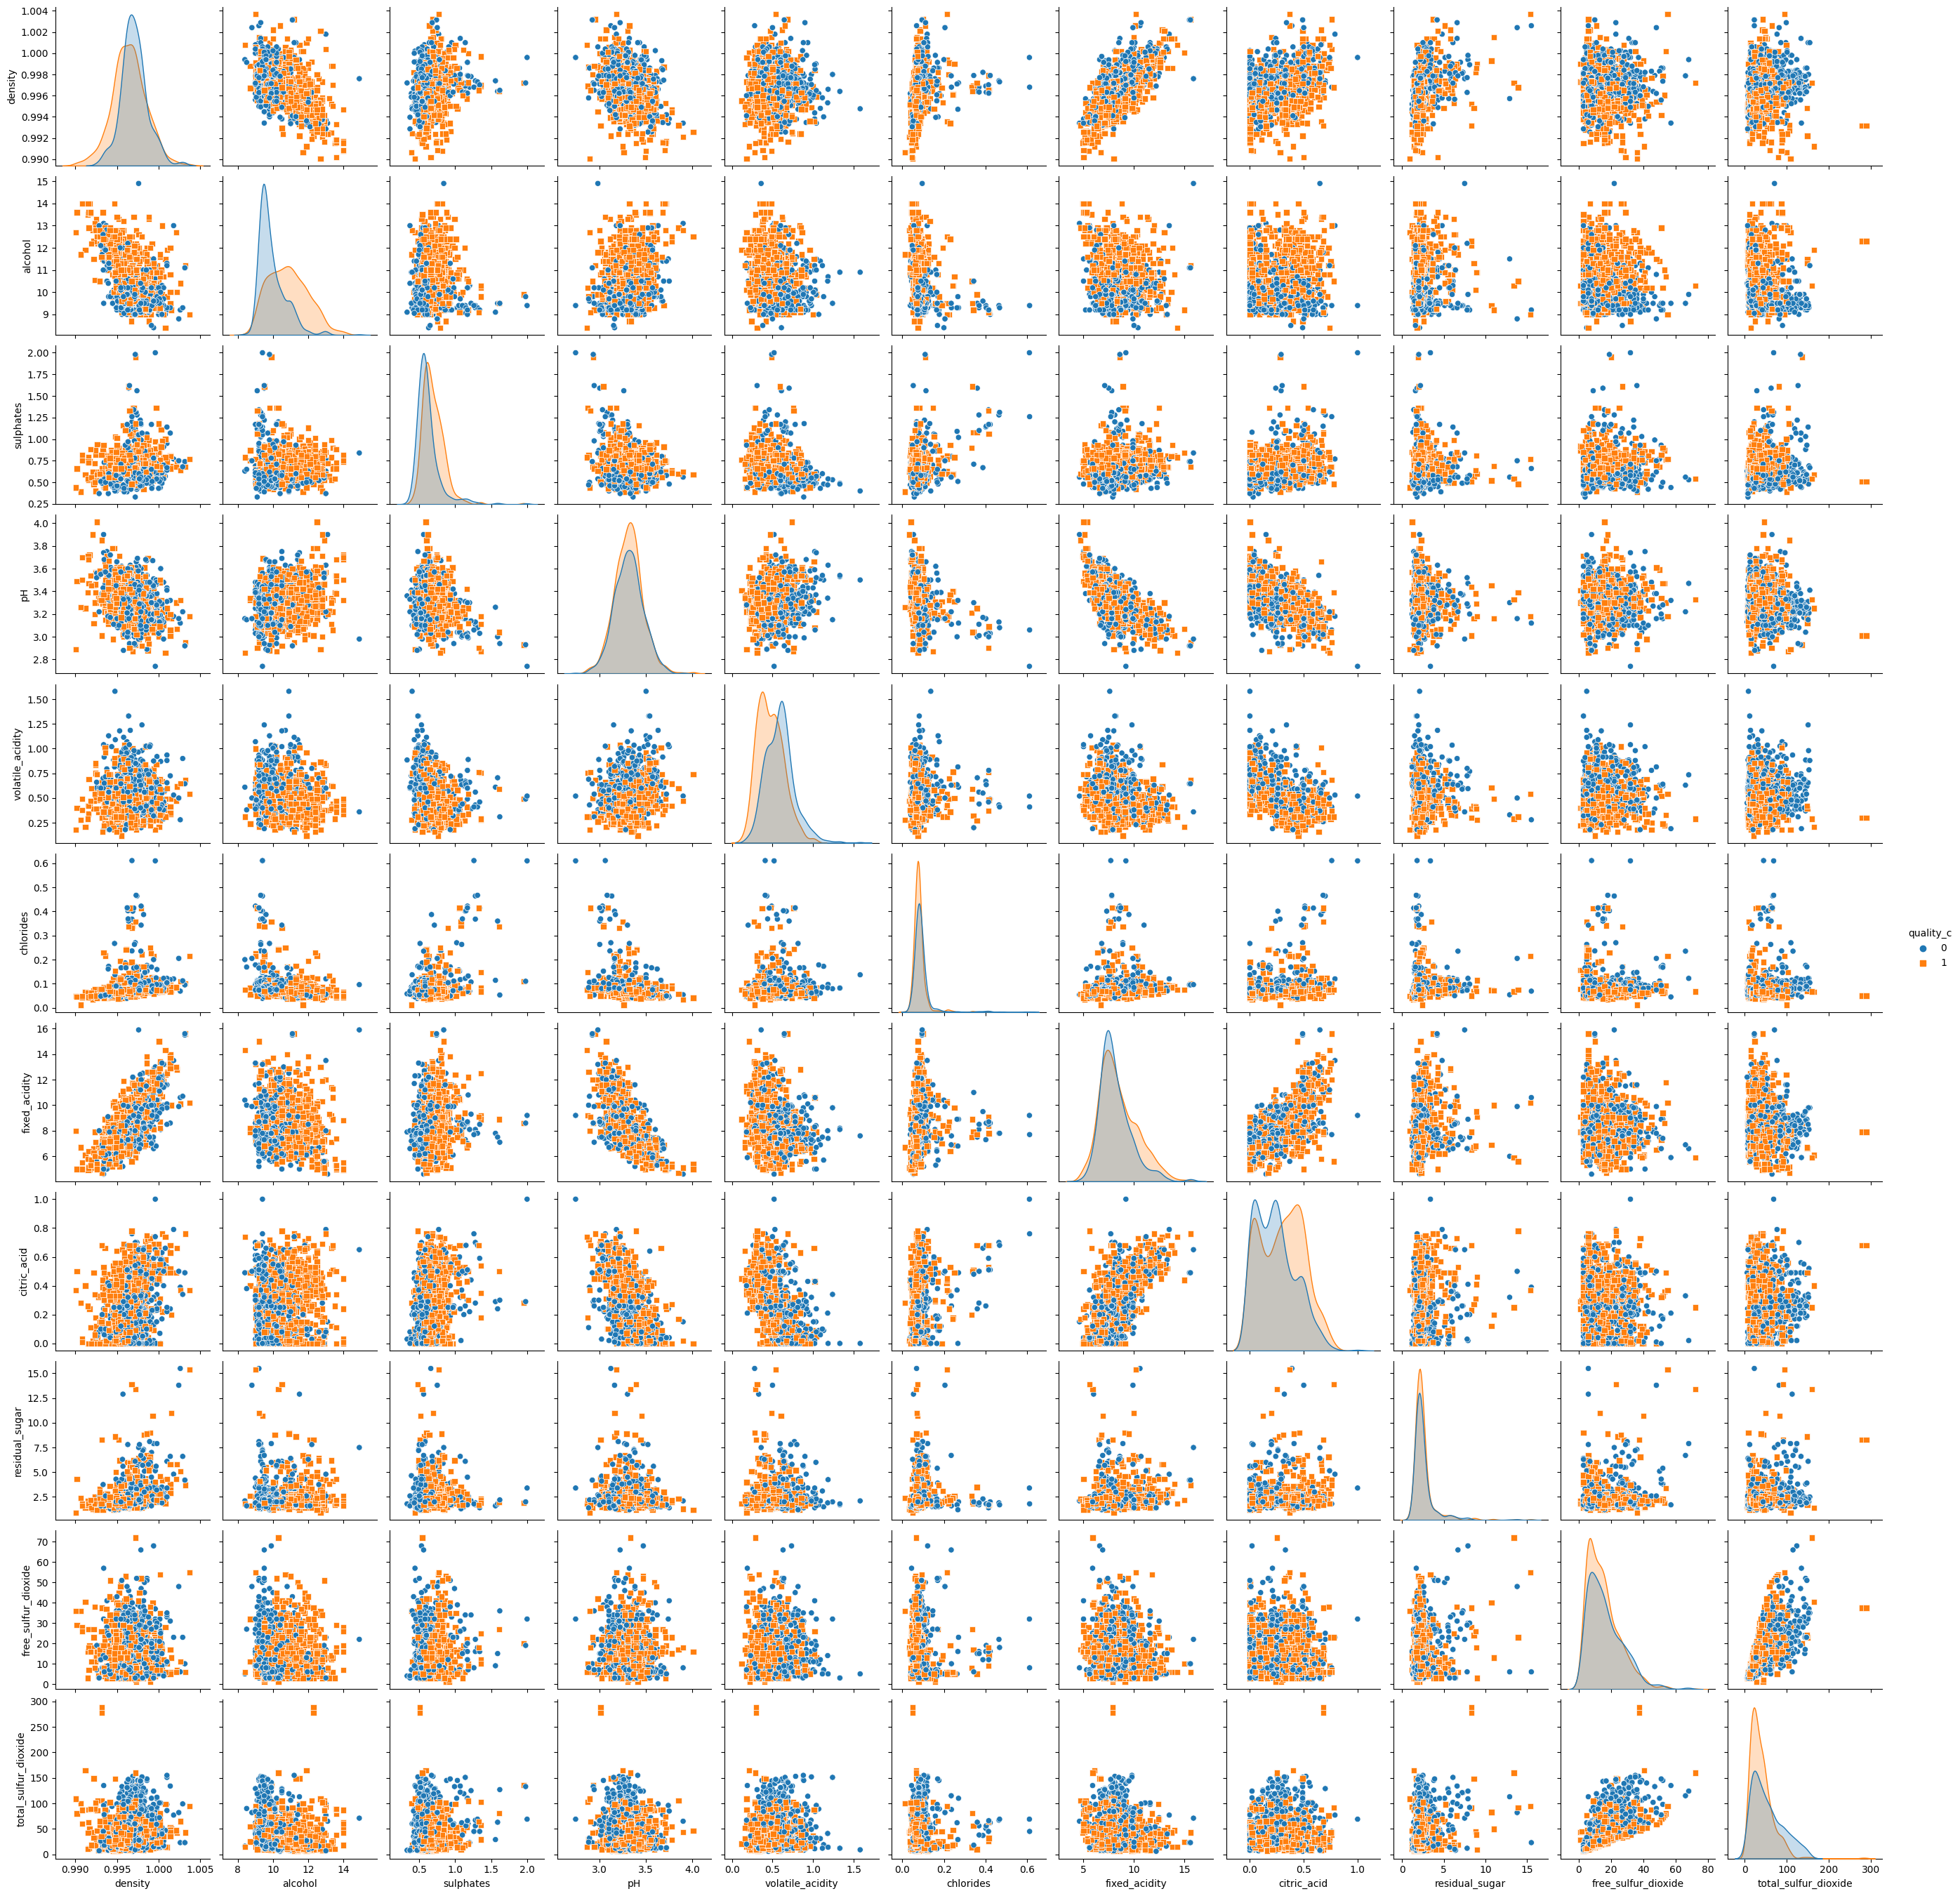

In [59]:
# Create a pairplot
sns.pairplot(red, vars=["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides',
                        'fixed_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide',
                        'total_sulfur_dioxide'], hue='quality_c', diag_kind='kde', markers=['o', 's'])
plt.show()


## **Hypothesis Testing and ANOVA**

In [30]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

In [31]:
# Calculating the F-statistics and associated p-value
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print("\nMeans for total sulfur dioxide by quality marks of wine \n")
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Fri, 14 Apr 2023   Prob (F-statistic):           4.97e-20
Time:                          17:48:09   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

##**Model Building**

### Imports

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### ***Logistic Regression*** 

In [23]:
# recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)

# split into training and testing sets
predictors = red[["sulphates", 'alcohol']]
targets = red.quality_c

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

# builds model on training data
classifier = LogisticRegression()
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

# prints the confusion matrix and accuracy of the model
print('\nRed Wine\n')
print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
print ('Score:', classifier.score(pred_test, tar_test))
print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)


Red Wine

Confusion Matrix:
 [[105  54]
 [ 48 113]]
Accuracy: 0.68125
Score: 0.68125
RMSE: 0.5645794895318107


In [24]:
# recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)

# split into training and testing sets
predictors = red[['sulphates', 'alcohol','volatile acidity']]
targets = red.quality_c

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

# build model on training data
classifier = LogisticRegression()
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

# print the confusion matrix and accuracy of the model
print('\nRed Wine\n')
print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
print ('Score:', classifier.score(pred_test, tar_test))
print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)


Red Wine

Confusion Matrix:
 [[109  34]
 [ 52 125]]
Accuracy: 0.73125
Score: 0.73125
RMSE: 0.518411033833193


In [25]:
# recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
white['quality_c'] = white['quality'].map(recode)


# split into training and testing sets
predictors = white[['sulphates', 'alcohol','volatile acidity']]
targets = white.quality_c

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

# build model on training data
classifier = LogisticRegression()
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

# print the confusion matrix and accuracy of the model
print('\nWhite Wine\n')
print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
print ('Score:', classifier.score(pred_test, tar_test))
print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)


White Wine

Confusion Matrix:
 [[170 152]
 [ 98 560]]
Accuracy: 0.7448979591836735
Score: 0.7448979591836735
RMSE: 0.5050762722761054


### ***Decision Tree*** 

In [26]:
# recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)


# split into training and testing sets
predictors = red[["residual sugar", 'alcohol']]
targets = red.quality_c

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

# build model on training data
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)




predictions = classifier.predict(pred_test)

# print the confusion matrix and accuracy of the model
print('\nRed Wine\n')
print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
print ('Score:', classifier.score(pred_test, tar_test))
print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)


Red Wine

Confusion Matrix:
 [[103  46]
 [ 63 108]]
Accuracy: 0.659375
Score: 0.659375
RMSE: 0.5836308764964376


In [27]:
# recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
white['quality_c'] = white['quality'].map(recode)


# split into training and testing sets
predictors = white[["residual sugar", 'alcohol']]
targets = white.quality_c

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

# build model on training data
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train, tar_train)

predictions = classifier.predict(pred_test)

# print the confusion matrix and accuracy of the model
print('\nWhite Wine\n')
print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))

print ('Score:', classifier.score(pred_test, tar_test))
print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)


White Wine

Confusion Matrix:
 [[396 269]
 [323 972]]
Accuracy: 0.6979591836734694
Score: 0.6979591836734694
RMSE: 0.5495824017620384


### ***KNN*** 

----------------KNN------------------------
Confusion Matrix:
 [[ 96  44]
 [ 55 125]]
Accuracy: 0.690625
Score: 0.690625
RMSE: 0.5562148865321748


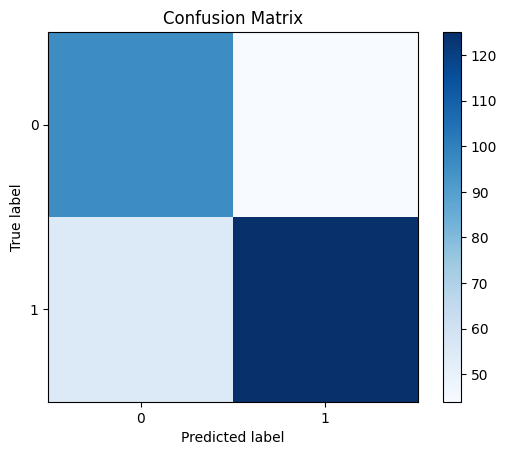

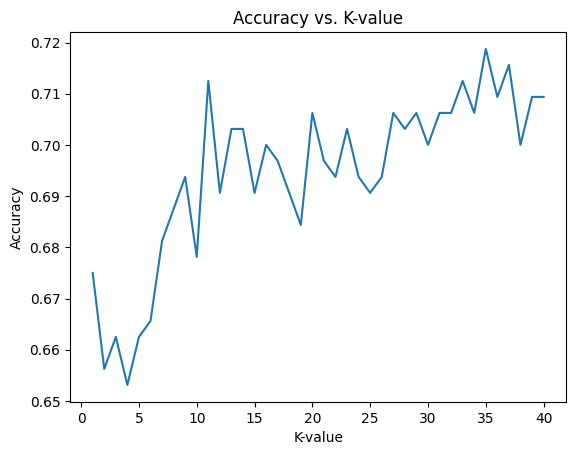

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def knn(red, k):
    
    # Recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    red['quality_c'] = red['quality'].map(recode)

    # Split into training and testing sets
    predictors = red[["residual_sugar", 'alcohol']]
    targets = red.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)
    
    # Build model on training data
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # Print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n', confusion_matrix(tar_test, predictions))
    print('Accuracy:', accuracy_score(tar_test, predictions))
    
    print('Score:', classifier.score(pred_test, tar_test))
    print('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)
    
    # Plot confusion matrix
    cm = confusion_matrix(tar_test, predictions)
    labels = ['0', '1']
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
    plt.show()
    
    # Plot accuracy vs. k-value
    k_values = np.arange(1, 41)
    accuracy = []
    for k in k_values:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(pred_train, tar_train)
        accuracy.append(accuracy_score(tar_test, classifier.predict(pred_test)))
    plt.plot(k_values, accuracy)
    plt.title('Accuracy vs. K-value')
    plt.xlabel('K-value')
    plt.ylabel('Accuracy')
    plt.show()

# Call the knn function with a specific k-value, e.g., k=5
print('----------------KNN------------------------')
knn(red, k=15)


### ***Random Forests*** 

----------------Random Forests------------------------

Red Wine

Confusion matrix:
 [[242  79]
 [ 48 271]]
Accuracy: 0.8015625

Importance of predictors:
[('alcohol', 0.17573835837441149), ('sulphates', 0.11404432475402915), ('total_sulfur_dioxide', 0.10539792072711547), ('volatile_acidity', 0.10050628581411694), ('density', 0.08416284644769963), ('pH', 0.07182341489607665), ('chlorides', 0.07138426639781159), ('residual_sugar', 0.0712948660886659), ('citric_acid', 0.07098320582598804), ('free_sulfur_dioxide', 0.06840991748142046), ('fixed_acidity', 0.06625459319266466)]


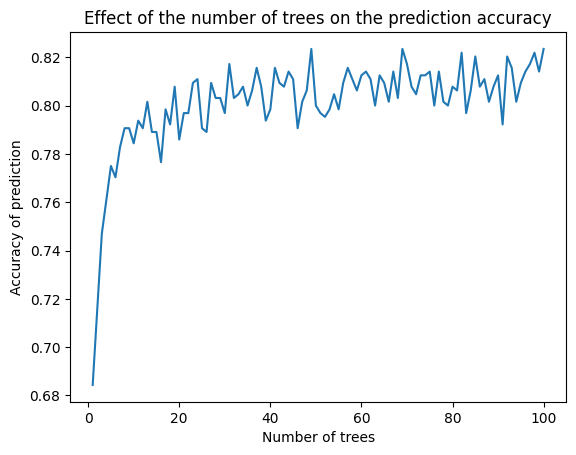

[0.684375, 0.715625, 0.746875, 0.7609375, 0.775, 0.7703125, 0.7828125, 0.790625, 0.790625, 0.784375, 0.79375, 0.790625, 0.8015625, 0.7890625, 0.7890625, 0.7765625, 0.7984375, 0.7921875, 0.8078125, 0.7859375, 0.796875, 0.796875, 0.809375, 0.8109375, 0.790625, 0.7890625, 0.809375, 0.803125, 0.803125, 0.796875, 0.8171875, 0.803125, 0.8046875, 0.8078125, 0.8, 0.80625, 0.815625, 0.8078125, 0.79375, 0.7984375, 0.815625, 0.809375, 0.8078125, 0.8140625, 0.8109375, 0.790625, 0.8015625, 0.80625, 0.8234375, 0.8, 0.796875, 0.7953125, 0.7984375, 0.8046875, 0.7984375, 0.809375, 0.815625, 0.8109375, 0.80625, 0.8125, 0.8140625, 0.8109375, 0.8, 0.8125, 0.809375, 0.8015625, 0.8140625, 0.803125, 0.8234375, 0.8171875, 0.8078125, 0.8046875, 0.8125, 0.8125, 0.8140625, 0.8, 0.8140625, 0.8015625, 0.8, 0.8078125, 0.80625, 0.821875, 0.796875, 0.80625, 0.8203125, 0.8078125, 0.8109375, 0.8015625, 0.8078125, 0.8125, 0.7921875, 0.8203125, 0.815625, 0.8015625, 0.809375, 0.8140625, 0.8171875, 0.821875, 0.8140625, 0.8

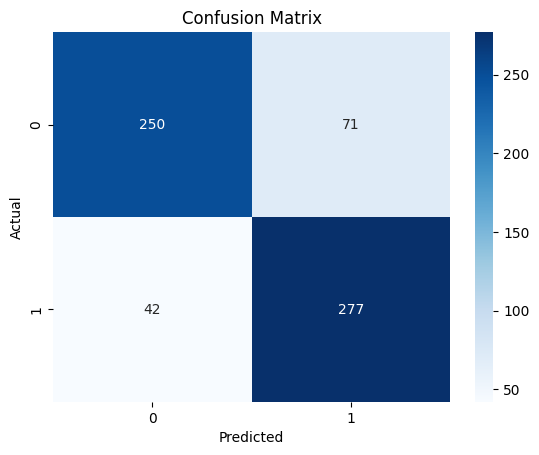


White Wine

Confusion matrix:
 [[ 417  237]
 [ 130 1176]]
Accuracy: 0.8127551020408164

Importance of predictors:
[('alcohol', 0.15358399102825654), ('volatile_acidity', 0.11905254391437792), ('density', 0.09821146490910503), ('free_sulfur_dioxide', 0.08661825702693703), ('citric_acid', 0.08394172487955087), ('total_sulfur_dioxide', 0.0812594214860312), ('chlorides', 0.08114085363789325), ('residual_sugar', 0.07918239240423819), ('pH', 0.07586091856435638), ('fixed_acidity', 0.07127930358882571), ('sulphates', 0.06986912856042787)]


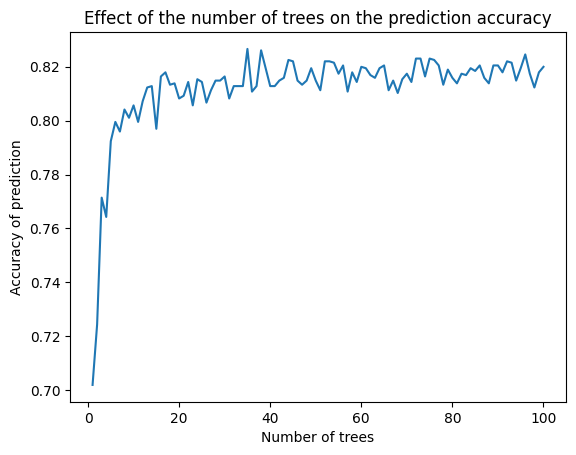

[0.7020408163265306, 0.7244897959183674, 0.7714285714285715, 0.7642857142857142, 0.7923469387755102, 0.7994897959183673, 0.7959183673469388, 0.8040816326530612, 0.8010204081632653, 0.8056122448979591, 0.7994897959183673, 0.8071428571428572, 0.8122448979591836, 0.8127551020408164, 0.7969387755102041, 0.8163265306122449, 0.8178571428571428, 0.813265306122449, 0.8137755102040817, 0.8081632653061225, 0.8091836734693878, 0.8142857142857143, 0.8056122448979591, 0.8153061224489796, 0.8142857142857143, 0.8066326530612244, 0.8112244897959183, 0.814795918367347, 0.814795918367347, 0.8163265306122449, 0.8081632653061225, 0.8127551020408164, 0.8127551020408164, 0.8127551020408164, 0.826530612244898, 0.8107142857142857, 0.8127551020408164, 0.8260204081632653, 0.8193877551020409, 0.8127551020408164, 0.8127551020408164, 0.814795918367347, 0.8158163265306122, 0.8224489795918367, 0.8219387755102041, 0.814795918367347, 0.813265306122449, 0.814795918367347, 0.8193877551020409, 0.814795918367347, 0.811224

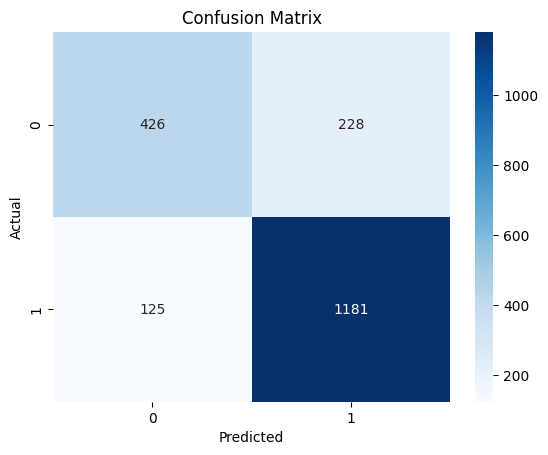

In [84]:
def random_forests(wine_set):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('\nImportance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

    # Plot the confusion matrix
    sns.heatmap(sklearn.metrics.confusion_matrix(tar_test, predictions), annot=True, cmap="Blues", fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

print('----------------Random Forests------------------------')
call(random_forests)

### ***SVM*** 

Confusion matrix:
 [[117  26]
 [ 46 131]]
Accuracy: 0.775


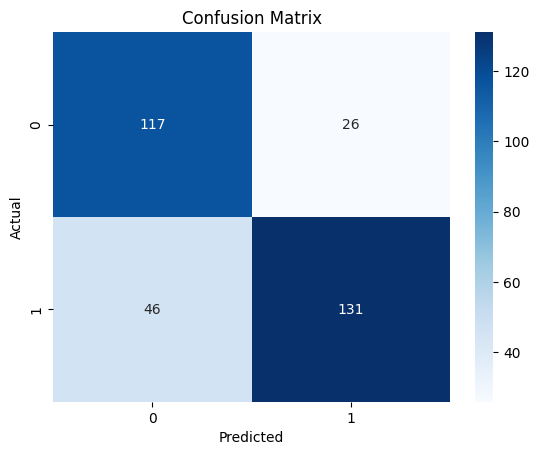

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Recode the 'quality' column into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)

# Split into predictors and target variable
predictors = red[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                       'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
target = red['quality_c']

# Split into training and testing sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.2)

# Create and train the SVM model
svm = SVC(kernel='linear')  # You can also try different kernels such as 'rbf' or 'poly'
svm.fit(pred_train, tar_train)

# Make predictions on the testing data
predictions = svm.predict(pred_test)

# Print the confusion matrix and accuracy of the model
cm = confusion_matrix(tar_test, predictions)
print('Confusion matrix:\n', cm)
print('Accuracy:', accuracy_score(tar_test, predictions))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion matrix:
 [[125  23]
 [ 63 109]]
Accuracy: 0.73125


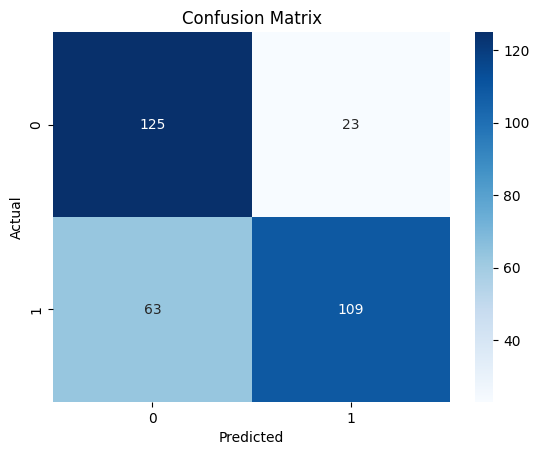

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Recode the 'quality' column into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)

# Split into predictors and target variable
predictors = red[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                       'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
target = red['quality_c']

# Perform Min-Max scaling on the predictors
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Split into training and testing sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors_scaled, target, test_size=.2)

# Create and train the SVM model
svm = SVC(kernel='linear', C=0.1, gamma='scale')  # You can also try different kernels such as 'rbf' or 'poly'
svm.fit(pred_train, tar_train)

# Make predictions on the testing data
predictions = svm.predict(pred_test)

# Print the confusion matrix and accuracy of the model
cm = confusion_matrix(tar_test, predictions)
print('Confusion matrix:\n', cm)
print('Accuracy:', accuracy_score(tar_test, predictions))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


***Grid Search CV*** 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# Recode the 'quality' column into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)

# Split into predictors and target variable
predictors = red[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                       'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
target = red['quality_c']

# Split into training and testing sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.2)

# Specify the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.1, 1, 10],
              'degree': [2, 3, 4]}

# Create the SVM model
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(pred_train, tar_train)  # Replace X and y with your predictors and target variable

# Get the best parameter values
best_params = grid_search.best_params_


KeyboardInterrupt: ignored